In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
silence_warnings()
import warnings
warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


23:15:54 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=283905;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=351530;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=998033;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=332405;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

23:15:55 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=485;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=661037;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

23:15:55 INFO      Starting 3ML!                                                                     ]8;id=503149;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=170703;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=856127;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=693332;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=838092;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=381370;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=56457;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=346098;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

23:15:56 WARNING   Multinest minimizer not available                                           ]8;id=227543;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=722969;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=516979;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=158682;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

23:15:56 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=496091;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=340837;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=287858;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=964472;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=959882;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=925572;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   No fermitools installed                                              ]8;id=461508;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=655833;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Yourlib init successful!!!


In [ ]:
# you can do some change about the lib and reload it any time.
reload(my)


WARNING DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



23:17:29 INFO      Creating singleton for                                                            ]8;id=709035;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=786425;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#41\41]8;;\
                  /data/home/cwy/Science/3MLWCDA0.91/Standard/src/../../data/DR_ihep_MK2_newpsf.root               

23:17:33 INFO      Region of Interest:                                                                   ]8;id=268674;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=636340;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#271\271]8;;\

         INFO      -------------------                                                                   ]8;id=598221;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=552500;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#272\272]8;;\

         INFO      HealpixConeROI: Center (R.A., Dec) = (83.630, 22.020), data radius =      ]8;id=410678;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_cone_roi.py\healpix_cone_roi.py]8;;\:]8;id=171193;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_cone_roi.py#87\87]8;;\
                  5.000 deg, model radius: 8.000 deg                                                               

         INFO                                                                                            ]8;id=416914;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=893847;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#275\275]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=407146;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=342541;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#276\276]8;;\

         INFO      --------------------                                                                  ]8;id=178371;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=309522;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#277\277]8;;\

         INFO      Width x height: 96 x 96 px                                                            ]8;id=489234;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=809880;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#279\279]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=445611;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=76879;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#281\281]8;;\

         INFO                                                                                            ]8;id=655515;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=938271;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#283\283]8;;\

         INFO      Response:                                                                             ]8;id=327285;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=770985;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#284\284]8;;\

         INFO      ---------                                                                             ]8;id=887314;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=758734;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#285\285]8;;\

         INFO      Response file:                                                                   ]8;id=289884;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=645392;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA0.91/Standard/src/../../data/DR_ihep_MK2_newpsf.roo                
                  t                                                                                                

         INFO      Number of dec bins: 110                                                          ]8;id=968004;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=610491;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=809254;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=98483;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=784198;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=923180;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#289\289]8;;\

         INFO      Map Tree:                                                                             ]8;id=47446;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=502653;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#290\290]8;;\

         INFO      ----------                                                                            ]8;id=318237;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=447175;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,RING,14079578.0,1.398376e+07,1.006852,23950,78.519855
1,1,1024,RING,6973954.0,6.879985e+06,1.013658,23950,78.519855
2,2,1024,RING,1182007.0,1.151274e+06,1.026695,23950,78.519855
3,3,1024,RING,504982.0,4.846976e+05,1.041850,23950,78.519855
4,4,1024,RING,136805.0,1.291262e+05,1.059467,23950,78.519855
5,5,1024,RING,35187.0,3.241292e+04,1.085586,23950,78.519855


         INFO      This Map Tree contains 784.448 transits in the first bin                         ]8;id=581996;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=963174;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.30 Mb                                                         ]8;id=537278;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=997321;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=9422;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=99629;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=241450;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=663230;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      -------------------------------                                                       ]8;id=19970;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=79245;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=738784;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=498510;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

Error in <TTreeFormula::Compile>:  Bad numerical expression : "name"


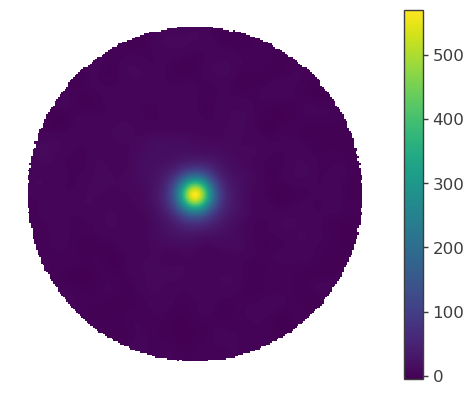

In [2]:
#####   Data Initialize

# maptree = "../../data/gcd_new.root"
# response = "../../data/WCDA_DR_psf.root"

maptree = "../../data/20210305_20230731_ihep_goodlist.root"
# response = "../../data/DR_ihep_MK2.root"
response = "../../data/DR_ihep_MK2_newpsf.root"

region_name="Crab"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')
ra_crab, dec_crab = 83.63,22.02
ra1,dec1=ra_crab, dec_crab

data_radius = 5.0
model_radius = 8.0
roi=HealpixConeROI(ra=ra1,dec=dec1,data_radius=data_radius,model_radius=model_radius)  
WCDA = HAL("WCDA", maptree, response, roi, flat_sky_pixels_size=0.17)

#####   Data Situation
%matplotlib inline
WCDA.set_active_measurements(0, 5)
WCDA.display()

fig = WCDA.display_stacked_image(smoothing_kernel_sigma=0.25)
fig.show()
fig.savefig(f"../res/{region_name}/counts_all.png",dpi=300)

In [3]:
Modelname="1pt_beys"  # Name your model now to facilitate the creation of record folders by the program.
if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
    os.system(f'mkdir ../res/{region_name}/{Modelname}/')


#Without extended parameter settings, it's a point source. When you set the corresponding extension, it becomes the respective source.
# crab = my.setsorce("crab",ra1,dec1, fitrange=1,
#                 indexb=(-10,-1), kb=(1e-14, 1e-8),
#                 )

crab = my.setsorce("crab",ra1,dec1, fitrange=0.5, alpha=-2.6,alphab=(-4,-1),beta=0.1, #, sigma=0.001, sb=(0,0.1),
                spec=Log_parabola()
                )
# crab2 = my.setsorce("crab2",ra1,dec1, fitrange=0.5, indexb=(-10,-1), kb=(1e-14, 1e-8)
#                 )

# ext1 = my.setsorce("ext1",85.5,23.5, fitrange=1, sigma=1, sb=(0,3),
#                 indexb=(-10,1), kb=(1e-15, 1e-8)
#                 )

lm = Model(crab) #crab2, , ext1

lm.crab.spectrum.main.Log_parabola.alpha.set_uninformative_prior(Uniform_prior)
lm.crab.spectrum.main.Log_parabola.K.set_uninformative_prior(Log_uniform_prior)
lm.crab.spectrum.main.Log_parabola.beta.prior = Uniform_prior(
    lower_bound=-10, upper_bound=10
)
lm.crab.position.ra.set_uninformative_prior(Uniform_prior)
lm.crab.position.dec.set_uninformative_prior(Uniform_prior)

with open(f'../res/{region_name}/{Modelname}/Model_init.txt', 'w') as f:
    for key, value in lm.parameters.items():
        f.write(f'{key}: {value}\n')

lm.display(complete=True)

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (5):
--------------------

                                       value min_value max_value   
crab.position.ra                       83.63     83.13     84.13  \
crab.position.dec                      22.02     21.52     22.52   
crab.spectrum.main.Log_parabola.K        0.0       0.0  100000.0   
crab.spectrum.main.Log_parabola.alpha   -2.6      -4.0      -1.0   
crab.spectrum.main.Log_parabola.beta     0.1      None      None   

                                                 unit  
crab.position.ra                                  deg  
crab.position.dec                                 deg  
crab.spectrum.main.Log_parabola.K      keV-1 s-1 cm-2  
crab.spectrum.main.Log_parabola.alpha                  
crab.spectrum.main.Log_parabola.beta                   

Fixed parameters (1):
---------------------

                                            value min_value max_value unit
crab.spectrum.main.Log_parabola.piv  3000000000.0      None      None  keV

Properties (0):
--------------------

(none)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

In [4]:
bs = BayesianAnalysis(lm, DataList(WCDA))
bs.set_sampler("emcee")
bs.sampler.setup(100)
# This uses the ultranest sampler
samples = bs.sample(quiet=True)

23:17:48 INFO      sampler set to emcee                                                    ]8;id=223303;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=943047;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

23:35:16 INFO      Mean acceptance fraction: 0.37599999999999995                               ]8;id=492190;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=803850;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/emcee_sampler.py#157\157]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=781174;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=675774;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=692936;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=703784;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py#178\178]8;;\

In [5]:
bs.results.display()

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
crab.position.ra,(8.3666 -0.011 -0.0008) x 10,deg
crab.position.dec,(2.2011 +0.0009 +0.016) x 10,deg
crab.spectrum.main.Log_parabola.K,(5.5 +0.7 +6) x 10^-23,1 / (cm2 keV s)
crab.spectrum.main.Log_parabola.alpha,-2.5 +0.8 +1.2,
crab.spectrum.main.Log_parabola.beta,(-3.7 +1.9 +4) x 10^-1,


Values of -log(posterior) at the minimum:

,-log(posterior)
WCDA,-46049.831343
total,-46049.831343


Values of statistical measures:

,statistical measures
AIC,92109.663103
BIC,92159.040101
DIC,112404.243703
PDIC,-7358.788108


processing Bayesian analyses:   0%|          | 0/1 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/500 [00:00<?, ?it/s]

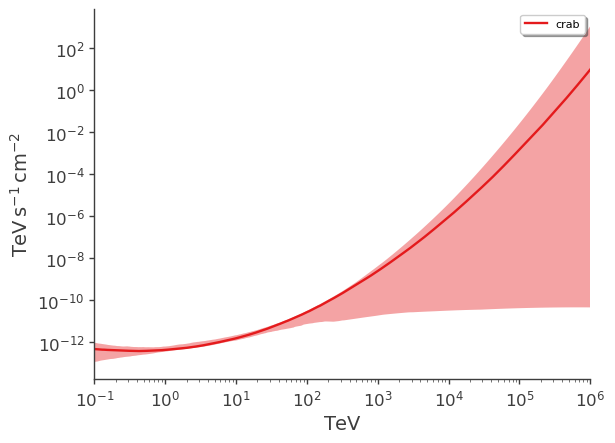

In [ ]:
fluxes_bs = bs.results.get_flux(100 * u.keV, 1 * u.MeV)
x_Max=50.
x_Min=.1
y_Min=0.2e-13
y_Max=1e-8
fig = plot_spectra(
    bs.results, ene_min=x_Min, ene_max=x_Max, num_ene=30,  energy_unit="TeV", flux_unit="TeV / (cm2 s)"
)

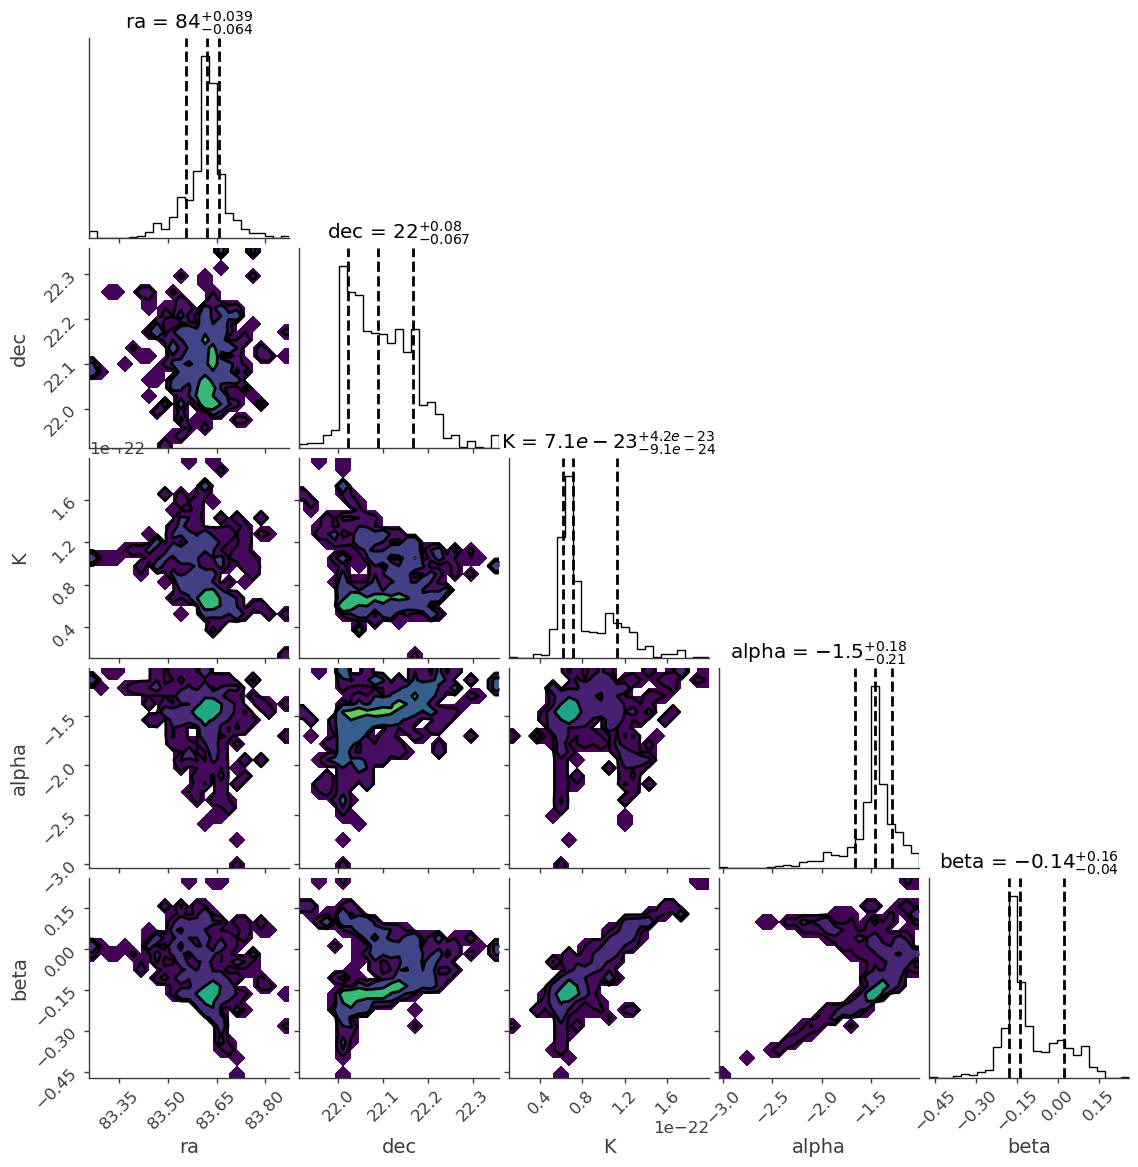

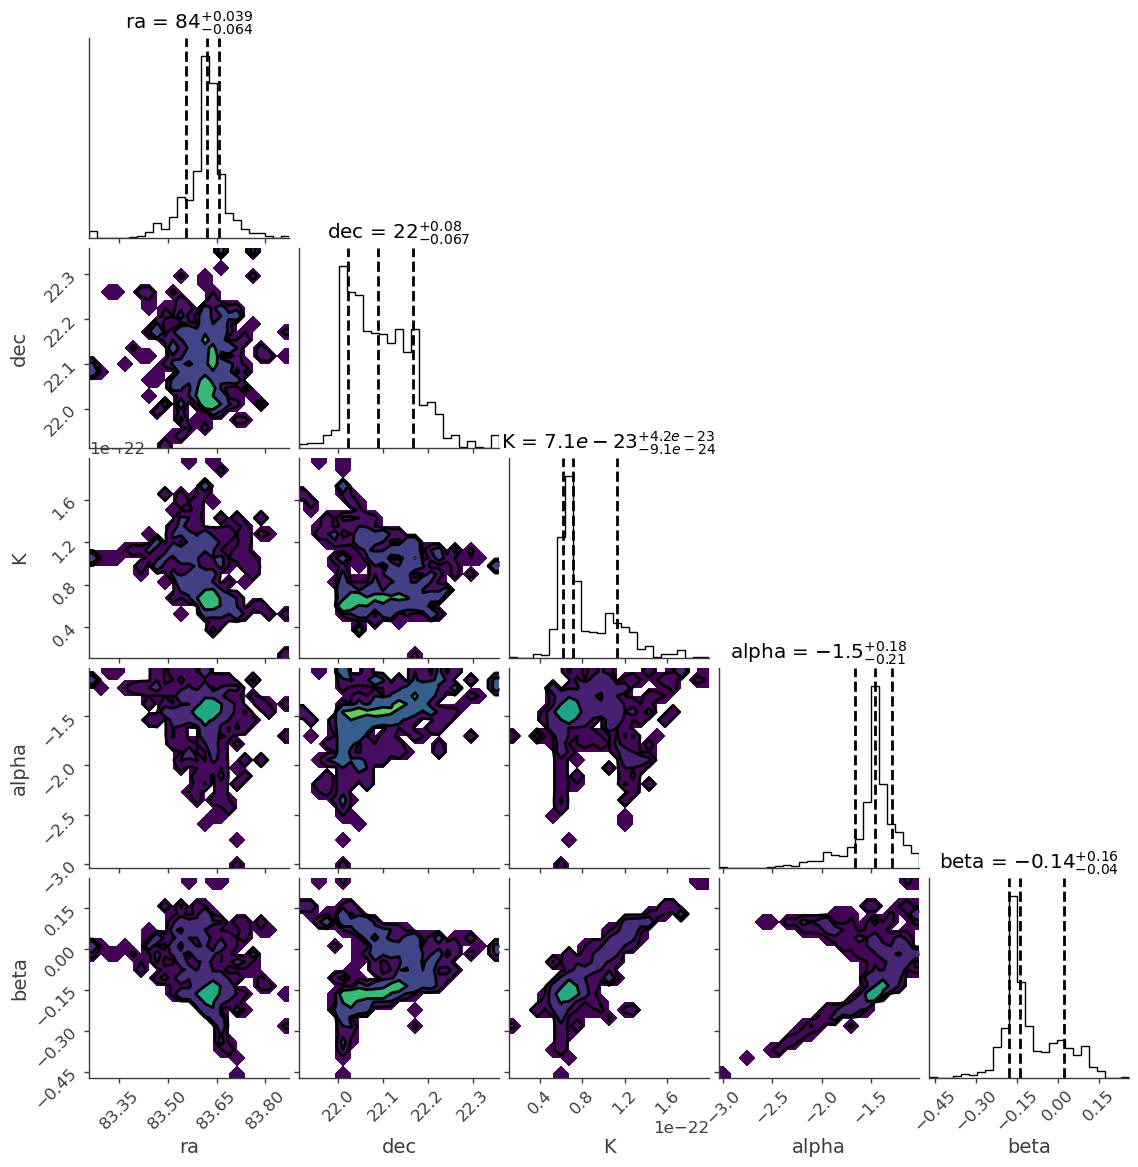

In [7]:
bs.results.corner_plot()

In [ ]:
# Attempt the fitting; it will take approximately two minutes.
result = my.fit(region_name, Modelname, WCDA, lm, 0, 5, mini="minuit")
sources = my.get_sources(lm,result)
result[1][0]
# result[0].get_contours(J0248.Gaussian_on_sphere.lon0,39.88,44.88,30)

In [ ]:
# Compute Ts,  it will take approximately five minutes.
TSlist = ["crab", "ext1"] # A list put the sources that you want to compute TS
TS = {}
for sc in tqdm(TSlist):
    TS[sc]=result[0].compute_TS(sc,result[1][1]).values[0][2]
llh = WCDA.get_log_like()
TS_all = WCDA.cal_TS_all()
TS["TS_all"] = TS_all
TS["-log(likelihood)"] = -llh
TSresults = pd.DataFrame([TS])
TSresults.to_csv(f'../res/{region_name}/{Modelname}/Results.txt', sep='\t', mode='a', index=False)
TSresults

In [ ]:
%matplotlib inline
sources = my.get_sources(lm,result)

map2, skymapHeader = hp.read_map("../../data/signif_20210305_20230731_ihep_goodlist_nHit006_0.29.fits.gz.fits.gz",h=True)
map2 = hp.ma(map2)
fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=6, contours=[1000],save=True)
# radx= 10; rady = 10
# ymax = dec1+rady/2
# ymin = dec1-rady/2
# xmin = ra1-radx/2
# xmax = ra1+radx/2
# my.Drawcat(xmin,xmax,ymin,ymax,"4FGL","^","black",60,label="4FGL",textlabel=True)
# my.Drawcat(xmin,xmax,ymin,ymax,"QSO",">","black",60,label="QSO",textlabel=True)
# my.Drawcat(xmin,xmax,ymin,ymax,"Simbad",".","black",90,fontsize=3,label="AGN",stype="AGN",textlabel=False)
# There are many catalog, you can find it in my souce code.
plt.legend()

In [ ]:
Flux_WCDA = my.getdatapoint(WCDA, lm, maptree, response, roi, "crab")
Flux_WCDA2 = my.getdatapoint(WCDA, lm, maptree, response, roi, "ext1")
# Flux_WCDA3 = my.getdatapoint(WCDA, lm, maptree, response, roi, "crab2")

In [ ]:
%matplotlib inline
x_Max=50.
x_Min=.1
y_Min=0.2e-13
y_Max=1e-8
fig,ax = plt.subplots()
plot_spectra(
    result[0].results,
    sources_to_use=["crab", "crab2", "ext1"],
    include_extended=True,
    ene_min=x_Min,
    ene_max=x_Max,
    num_ene=30,
    energy_unit="TeV",
    flux_unit="TeV/(s cm2)",
    subplot=ax
    )

my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA,"Crab_data","tab:red")
# my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA3,"Crab_data2","tab:blue")
my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA2,"ext1_data","tab:blue")

e_J0248=np.linspace(x_Min,x_Max,500)
crab_data = np.array([[0.645589, 4.99911e-11, 5.2533e-12],
[1.23979, 3.89817e-11, 2.24529e-12],
[2.42276, 2.40127e-11, 1.76418e-12],
[4.06902, 1.73829e-11, 1.68635e-12],
[6.35322, 9.85614e-12, 1.47362e-12],
[12.3595, 8.32206e-12, 8.84423e-13]])
flux_J0248_sci=e_J0248**2*8.2e-14*pow(e_J0248/10,-2.9-0.19*np.log10(e_J0248/10))
plt.errorbar(crab_data[:,0], crab_data[:,1], crab_data[:,2],label='Crab Science',fmt="o", c = "tab:purple")
plt.plot(e_J0248,flux_J0248_sci,label='LHAASO Science', c = "tab:purple")

LHAASO_sensitivity = np.genfromtxt("./LHAASO_sensitivity.csv",delimiter=',')
plt.plot(LHAASO_sensitivity[:,0],LHAASO_sensitivity[:,1]*1e-11,label="LHAASO 1yr", c="black")

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
plt.legend()
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')

In [ ]:
f1 = Flux_WCDA[0][3]*1e9*Flux_WCDA[0][0]**2
e1 = Flux_WCDA[0][0]
f2=Flux_WCDA[0][0]**2*8.2e-14*pow(Flux_WCDA[0][0]/10,-2.9-0.19*np.log10(Flux_WCDA[0][0]/10))
print(e1, f1, f2, (f2-f1)/f2)

In [ ]:
#About 5 min
smoothsigma=[0.4123, 0.3111, 0.2476, 0.2064, 0.1633, 0.1379, 0.2896, 0.2594, 0.2152, 0.189, 0.1561, 0.14]#The first six bins are normal, and the following ones are merged bins, representing the total (merged), without the first bin, and without the first two bins, respectively.
maps = my.getmap(WCDA,roi,"Crab",
                 modelindex=[1,1], # modelindex: pt and ext number
               # pta=[0], exta=[0],
                   stack=[1.000927,1.000286,1.002131,1.005977,1.002093,1.004078], #Combine bins with all bin based on signal-to-noise ratio.
                  #  stack=[0, 0, 1.002131,1.005977,1.002093,1.004078], #Combine bins with nhit >= 200 based on signal-to-noise ratio.
                  #  stack=[0, 1.002131,1.005977,1.002093,1.004078],
                   smoothsigma=smoothsigma
                   #, binc=["1","2","3","4","5"]
                   )
smapall = my.smoothmap(maps[-1], smooth_sigma=0.2896)

In [ ]:
%matplotlib inline
psfdata = my.Draw_lateral_distribution(maps[0], 83.622, 22.002, 20, 0.1, True)

In [ ]:
%matplotlib inline
res=True # Do you want resmap? or org map.
saven = "Significance"
if res:
    saven+="_res"
sigmap = my.getsigmap(region_name, Modelname, [smapall],i=0,signif=17,res=res,name="Crab")
fig = my.drawmap(region_name, Modelname, sources, sigmap, ra1, dec1, rad=10, contours=[1000],save=True,savename=saven)
#There is another source around crab, so you can try another model: 1pt+1gaus maybe?

In [ ]:
# If you want to get residual llh map, you need a new rootfile.
my.write_resmap(region_name, Modelname, WCDA, roi, maptree, 
ra1, dec1, "crab_res",
[0],[0], #point source and ext source, if you have 3pt and 2 ext, and you only want sig about pt1, then use [1,0,0],[0, 0], or you only want 2nd ext: [0,0,0],[0,1]
binc="all"
)
# ! The file you got need use Add_UserInfo.cc in ./tools/llh_skymap to add UserInfo